# Task Name : Prediction using Unsupervised ML
## Task Description : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Author : Atharva Awale

Import following Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

###### Read the Iris dataset using the 'read_csv()' method and store the data in a data frame 'df'

In [2]:
df = pd.read_csv('C:\\Users\ATHARVA\Desktop\Sparks\')

###### See the first 5 records of the Iris dataset

In [15]:
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Check how many data points and variables are present in the dataset

In [5]:
df.shape

(150, 6)

###### concise summary of a DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###### Check how many data points are present for each class in Species / Check how many Flowers for each Species are present

In [7]:
df["Species"].value_counts() 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

###### Select all the four features (SepalLengthCm , SepalWidthCm , PetalLengthCm , PetalWidthCm ) of the dataset in a variable called 'x' to train the model with these features.

In [8]:
x = df.iloc[:, [1,2,3,4]].values

###### Plot a 2-d Scatter plot with color-coding

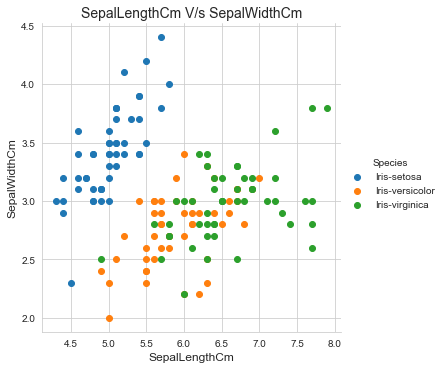

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
plt.xlabel('SepalLengthCm', fontsize=12)
plt.ylabel('SepalWidthCm' , fontsize=12)
plt.title("SepalLengthCm V/s SepalWidthCm", fontsize=14)
plt.show()

###### Finding the optimal number of clusters using the Elbow Method

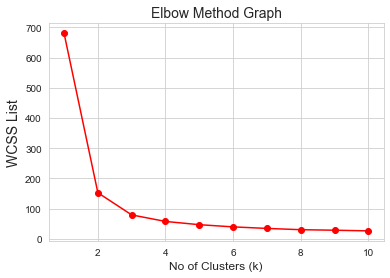

In [10]:
wcss_list= []  #Initializing the list for the value of wcss computed for different values of k ranging from 1 to 10

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list, c="red", marker= "o")
plt.title('Elbow Method Graph', fontsize=14)
plt.xlabel('No of Clusters (k)', fontsize=12)
plt.ylabel('WCSS List' , fontsize=14)
plt.show()

###### Training the K-means algorithm on the training dataset

In [11]:
kmeans = KMeans(n_clusters=3)

In [12]:
# 'y_predict' is the dependent variable to train the model.
y_predict= kmeans.fit_predict(x)

In [13]:
# Identify the center points of the data.
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

###### Visualize the Clusters

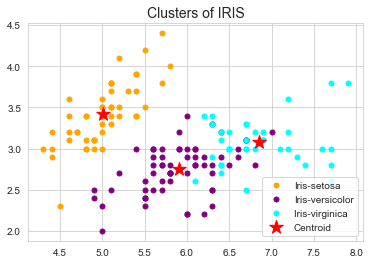

In [14]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, marker=".", c = 'orange', label = 'Iris-setosa') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, marker=".", c = 'purple', label = 'Iris-versicolor') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, marker=".", c = 'cyan', label = 'Iris-virginica ') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker="*", c = 'red', label = 'Centroid')
plt.title('Clusters of IRIS', fontsize=14)  
 
plt.legend()  
plt.show() 